In [3]:
# Single layer example of a thin layer made of SO₂:F with 150 nm thickness on a crystalline silicon substrate.
# The incident medium is air.

In [1]:
# Load modules
include("TMMOptics.jl")
include("RIdb.jl")
include("nplot.jl")
using Main.TMMOptics
using Main.RIdb: sno2f, air, silicon
using PyPlot

In [2]:
# Define beam
λi = 400 # intial wavelength [nm]
λf = 1000 # final wavelength [nm]
λ = LinRange(λi, λf, λf-λi+1) # wavelength range [nm]
# λ = λi:λf
λ0 = 700. # reference wavelength
θ = [0.] # angle of incidence [degrees]
p = 1. # polatization (s-wave = 0. and p-wave = 1., or any intermediate)
beam = PlaneWave(λ, λ0, θ, p);

In [3]:
# Define type of layers with their indexes of refraction and thicknesses
l0 = Geometrical(air(beam.λ), 0.); # incident medium
l1 = Geometrical(sno2f(beam.λ), 150.); # thin layer of interest, with 150 nm thickness
l2 = Geometrical(silicon(beam.λ), 0.); # on a silicon substrate

In [4]:
# Sequence of materials: elements represent the index position below in the structure (surface down to substrate)
nseq = [l0 l1 l2];

In [5]:
# We calculate the electromagnetic field profile
emfflag = 1
# Subdivision of each layer for the calculation of the EMF
h = 10;

In [6]:
# Perform computation
results = thinfilmoptics(beam, nseq, emfflag, h);

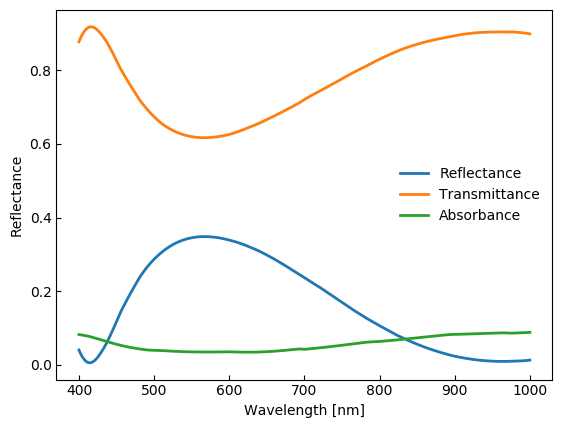

PyObject Text(24,0.5,'Reflectance')

In [7]:
# plot the R, T and A spectra
plot(λ, results.Spectra.R, label="Reflectance")
plot(λ, results.Spectra.T, label="Transmittance")
plot(λ, 1 .- (results.Spectra.T + results.Spectra.R), label="Absorbance")
legend(loc="best")
xlabel("Wavelength [nm]")
ylabel("Reflectance")

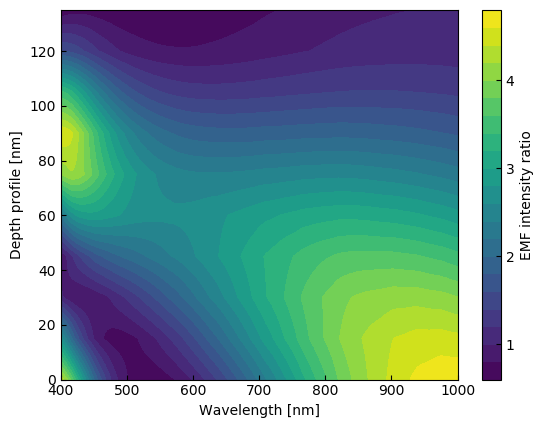

PyObject Text(24,0.5,'Depth profile [nm]')

In [8]:
# plot the EMF pattern
emfield = Matrix(dropdims(results.Field.emf, dims=2)') # surface plots cannot handle Adjoint yet
figure()
surface = contourf(λ, vec(results.Misc.ℓ), emfield, 20)
cb1_tags = floor.(LinRange(minimum(emfield), maximum(emfield), 5))
cb1 = colorbar(surface, ticks=cb1_tags)
cb1[:set_label]("EMF intensity ratio")
ax2 = gca()
xlabel("Wavelength [nm]")
ylabel("Depth profile [nm]")

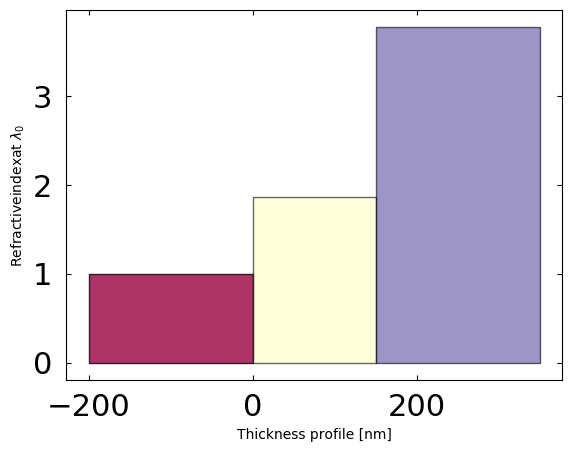

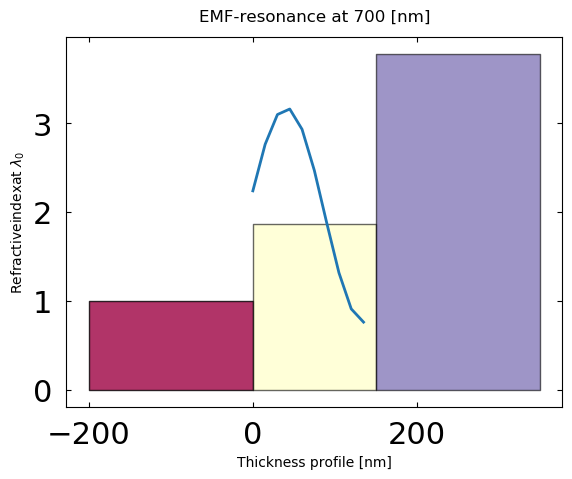

PyObject Text(0.5,1.02,'EMF-resonance at 700 [nm]')

In [9]:
# plot the refractive index profile
nplot(beam.λ, beam.θ, beam.λ0, results.Misc.d, results.Misc.ℓ, results.Field.emf, results.Misc.nλ0, nseq)

In [ ]:
# Notice in the profiles that the first and last media do not have any thickness, but were assigned 200 nm for
# the plotting purpose.